In [1]:
import os
import glob
import shutil
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from keras.models import Sequential, Model
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

%matplotlib inline

Using TensorFlow backend.


See the current directory structure.

In [2]:
!ls flowers

daisy  dandelion  rose	sunflower  tulip


In [0]:
data_path = "flowers"

# Visualize the dataset

In [4]:
flower_types = os.listdir("flowers")
flower_types

['dandelion', 'rose', 'sunflower', 'daisy', 'tulip']

**Get the data into a pandas dataframe.**

In [0]:
flower_names = []

In [0]:
for specie in flower_types:
    file_names = os.listdir(data_path+"/"+specie)
  
    for name in file_names:
        flower_names.append((specie, str(data_path+"/"+specie) + "/" + name))
        

        
flowers_df = pd.DataFrame(flower_names, columns=["Specie", "Image"])


In [7]:
flowers_df.head()

,Specie,Image
0,dandelion,flowers/dandelion/33890085903_0e10553b27_n.jpg
1,dandelion,flowers/dandelion/8011324555_375b7b5b0a.jpg
2,dandelion,flowers/dandelion/4265711814_9a006ee5b8.jpg
3,dandelion,flowers/dandelion/17388697431_0d84c427d1_n.jpg
4,dandelion,flowers/dandelion/32701230112_a33f8003a5_n.jpg


In [8]:
flowers_df.groupby("Specie").count()


,Image
Specie,
daisy,769
dandelion,1055
rose,784
sunflower,734
tulip,984


**The following graph shows the distribution of the number of different species of flowers.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


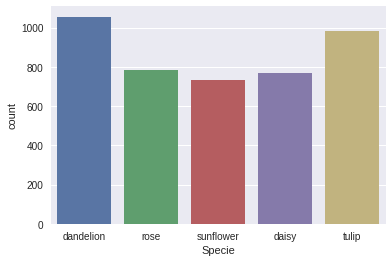

In [9]:
sns.countplot(x = "Specie", data=flowers_df)

**Flowers from each category.**

Pick 4 sample images of each category from the data frame.

In [0]:
random_samples = []

for specie in flower_types:
    samples = flowers_df[flowers_df["Specie"] == specie].sample(4).values
    
    for sample in samples:
        random_samples.append(sample)

In [11]:
for i in random_samples:
    print(i)

['dandelion' 'flowers/dandelion/4573886520_09c984ecd8_m.jpg']
['dandelion' 'flowers/dandelion/2674176237_e265ea64cc_n.jpg']
['dandelion' 'flowers/dandelion/3533075436_0954145b9f_m.jpg']
['dandelion' 'flowers/dandelion/2597655841_07fb2955a4.jpg']
['rose' 'flowers/rose/5835539224_75967fc400_m.jpg']
['rose' 'flowers/rose/2093263381_afd51358a3.jpg']
['rose' 'flowers/rose/16229215579_e7dd808e9c.jpg']
['rose' 'flowers/rose/5526964611_76ef13025c_n.jpg']
['sunflower' 'flowers/sunflower/5139969631_743880e01d_n.jpg']
['sunflower' 'flowers/sunflower/14646280372_dd50be16e4_n.jpg']
['sunflower' 'flowers/sunflower/7654774598_6b715a8d3e.jpg']
['sunflower' 'flowers/sunflower/15054750690_198b6ab0f2_n.jpg']
['daisy' 'flowers/daisy/530738000_4df7e4786b.jpg']
['daisy' 'flowers/daisy/14551098743_2842e7a004_n.jpg']
['daisy' 'flowers/daisy/5722473541_ffac1ae67e_n.jpg']
['daisy' 'flowers/daisy/7320089276_87b544e341.jpg']
['tulip' 'flowers/tulip/15516736553_b169b67195_n.jpg']
['tulip' 'flowers/tulip/5388013398

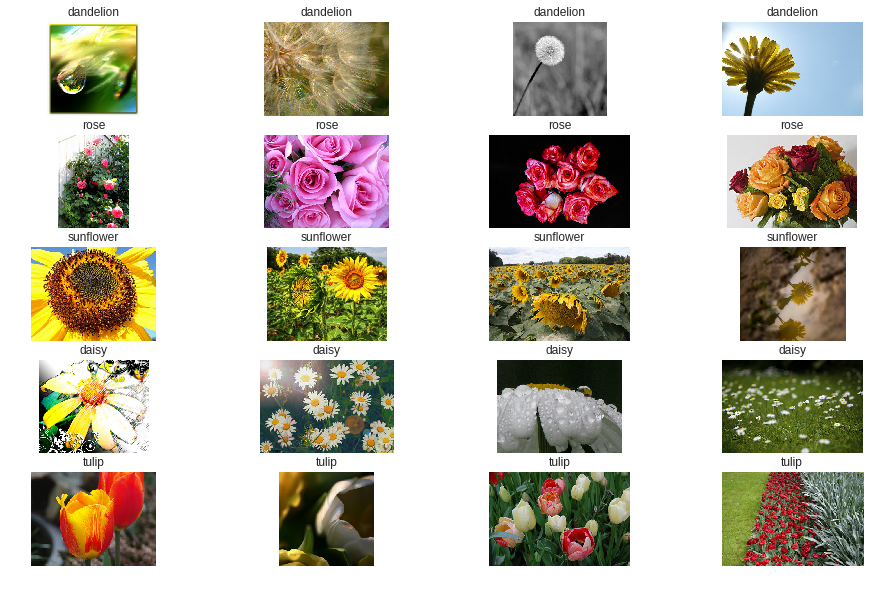

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 10))
# axes[0, 0] = plt.imshow(mpimg.imread(random_samples[0][1]))


for i, samples in enumerate(random_samples):
    axes[i//4, i%4].imshow(mpimg.imread(random_samples[i][1]))
    axes[i//4, i%4].set_title(str(random_samples[i][0]))
    axes[i//4, i%4].axis("off")


# Arrange the dataset as:



```
data/
    train/
        rose
        tulip
        ..
        ..
   
      test/
        rose
        tulip
        ..
        ..
```


        

In [0]:
!rm -r data

In [0]:
%mkdir -p data/train
%mkdir -p data/test

In [0]:
data_dir = "flowers/"
train_dir = "data/train/"
test_dir = "data/test/"

In [0]:
for i in flower_types:
    try:
        os.mkdir(train_dir + i)
        os.mkdir(test_dir + i)
    except:
        pass

# %mkdir -p data/train/daisy
# %mkdir -p data/train/tulip
# %mkdir -p data/train/sunflower
# %mkdir -p data/train/rose
# %mkdir -p data/train/dandelion

# %mkdir -p data/test/daisy
# %mkdir -p data/test/tulip
# %mkdir -p data/test/sunflower
# %mkdir -p data/test/rose
# %mkdir -p data/test/dandelion

In [0]:
for specie in flower_types:
    samples = flowers_df[flowers_df["Specie"] == specie]["Image"].values
    perm = np.random.permutation(samples)
    
#     Copy first 600 samples per specie to the test dir 
#     and rest to the train dir.

    for i in range(150):
        name = perm[i].split('/')[-1]
        shutil.copyfile(perm[i],'./data/test/' + str(specie) + '/'+ name)

    for i in range(151,len(perm)):
        name = perm[i].split('/')[-1]
        shutil.copyfile(perm[i],'./data/train/' + str(specie) + '/' + name)

        

# CNN Model

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')


Found 3569 images belonging to 5 classes.
Found 749 images belonging to 5 classes.


In [0]:
# def vgg_model():
#     # Get base model 
#     base_model = VGG16(include_top=False, input_shape=(150,150,3))
#     # Freeze the layers in base model
#     for layer in base_model.layers:
#         layer.trainable = False
#     # Get base model output 
#     base_model_ouput = base_model.output
    
#     # Add new layers
#     x = Flatten()(base_model.output)
#     x = Dense(500, activation='relu', name='fc1')(x)
#     x = Dropout(0.5)(x)
#     x = Dense(5, activation='softmax', name='fc2')(x)
    
#     model = Model(inputs=base_model.input, outputs=x)
#     return model

In [0]:
# model = vgg_model()

# # opt = Adam(lr=1e-3, decay=1e-6)
# model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# model.summary()

In [0]:
model = Sequential()
model.add(Convolution2D(input_shape = (150, 150, 3), filters=32, kernel_size=(3, 3), activation= "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation= "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))


model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation= "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Convolution2D(filters=128, kernel_size=(3, 3), activation= "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=5, activation="softmax"))



In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
model.fit_generator(
    training_set,
    epochs=50,
    validation_data=test_set)

Epoch 1/50
224/224 [==============================] - 41s 181ms/step - loss: 1.3632 - acc: 0.3915 - val_loss: 1.2312 - val_acc: 0.5087
Epoch 2/50
224/224 [==============================] - 37s 165ms/step - loss: 1.1670 - acc: 0.5025 - val_loss: 1.0457 - val_acc: 0.5874
Epoch 3/50
 88/224 [==========>...................] - ETA: 17s - loss: 1.0836 - acc: 0.5447

224/224 [==============================] - 37s 166ms/step - loss: 1.0862 - acc: 0.5569 - val_loss: 1.0822 - val_acc: 0.5607
Epoch 4/50
224/224 [==============================] - 37s 166ms/step - loss: 0.9856 - acc: 0.6130 - val_loss: 1.0329 - val_acc: 0.5768
Epoch 5/50
124/224 [===============>..............] - ETA: 13s - loss: 0.9721 - acc: 0.6321

224/224 [==============================] - 37s 166ms/step - loss: 0.9627 - acc: 0.6311 - val_loss: 0.9302 - val_acc: 0.6315
Epoch 6/50
224/224 [==============================] - 38s 170ms/step - loss: 0.9042 - acc: 0.6495 - val_loss: 0.8543 - val_acc: 0.6622
Epoch 7/50
134/224 [================>.............] - ETA: 12s - loss: 0.8573 - acc: 0.6623

224/224 [==============================] - 38s 171ms/step - loss: 0.8441 - acc: 0.6777 - val_loss: 0.8750 - val_acc: 0.6636
Epoch 8/50
224/224 [==============================] - 38s 170ms/step - loss: 0.8264 - acc: 0.6920 - val_loss: 0.8247 - val_acc: 0.6969
Epoch 9/50
132/224 [================>.............] - ETA: 12s - loss: 0.8202 - acc: 0.6955

224/224 [==============================] - 38s 171ms/step - loss: 0.8076 - acc: 0.6931 - val_loss: 0.8899 - val_acc: 0.6395
Epoch 10/50
224/224 [==============================] - 38s 172ms/step - loss: 0.7903 - acc: 0.7026 - val_loss: 0.8774 - val_acc: 0.6729
Epoch 11/50
131/224 [================>.............] - ETA: 12s - loss: 0.8071 - acc: 0.7004

224/224 [==============================] - 38s 172ms/step - loss: 0.7742 - acc: 0.7134 - val_loss: 0.7897 - val_acc: 0.7089
Epoch 12/50
224/224 [==============================] - 39s 172ms/step - loss: 0.7375 - acc: 0.7207 - val_loss: 0.7509 - val_acc: 0.7103
Epoch 13/50
134/224 [================>.............] - ETA: 12s - loss: 0.7085 - acc: 0.7444

224/224 [==============================] - 39s 174ms/step - loss: 0.7043 - acc: 0.7427 - val_loss: 0.7668 - val_acc: 0.7023
Epoch 14/50
224/224 [==============================] - 39s 175ms/step - loss: 0.6977 - acc: 0.7313 - val_loss: 0.8057 - val_acc: 0.7089
Epoch 15/50
132/224 [================>.............] - ETA: 12s - loss: 0.6712 - acc: 0.7315

224/224 [==============================] - 39s 173ms/step - loss: 0.6766 - acc: 0.7341 - val_loss: 0.7308 - val_acc: 0.7143
Epoch 16/50
224/224 [==============================] - 38s 172ms/step - loss: 0.6643 - acc: 0.7517 - val_loss: 0.7190 - val_acc: 0.7423
Epoch 17/50
132/224 [================>.............] - ETA: 12s - loss: 0.6350 - acc: 0.7670

224/224 [==============================] - 38s 171ms/step - loss: 0.6285 - acc: 0.7665 - val_loss: 0.7068 - val_acc: 0.7450
Epoch 18/50
224/224 [==============================] - 38s 170ms/step - loss: 0.6257 - acc: 0.7645 - val_loss: 0.7855 - val_acc: 0.7089
Epoch 19/50
136/224 [=================>............] - ETA: 11s - loss: 0.6136 - acc: 0.7707

224/224 [==============================] - 38s 171ms/step - loss: 0.6050 - acc: 0.7776 - val_loss: 0.7077 - val_acc: 0.7530
Epoch 20/50
224/224 [==============================] - 38s 171ms/step - loss: 0.5643 - acc: 0.7877 - val_loss: 0.7674 - val_acc: 0.7196
Epoch 21/50
134/224 [================>.............] - ETA: 12s - loss: 0.5882 - acc: 0.7757

224/224 [==============================] - 39s 172ms/step - loss: 0.5737 - acc: 0.7826 - val_loss: 0.7634 - val_acc: 0.7423
Epoch 22/50
224/224 [==============================] - 39s 172ms/step - loss: 0.5631 - acc: 0.7857 - val_loss: 0.6842 - val_acc: 0.7677
Epoch 23/50
130/224 [================>.............] - ETA: 12s - loss: 0.5373 - acc: 0.7904

224/224 [==============================] - 39s 174ms/step - loss: 0.5522 - acc: 0.7916 - val_loss: 0.6762 - val_acc: 0.7677
Epoch 24/50
224/224 [==============================] - 38s 172ms/step - loss: 0.5593 - acc: 0.7916 - val_loss: 0.7260 - val_acc: 0.7383
Epoch 25/50
133/224 [================>.............] - ETA: 12s - loss: 0.5022 - acc: 0.8134

224/224 [==============================] - 39s 172ms/step - loss: 0.5326 - acc: 0.8016 - val_loss: 0.6819 - val_acc: 0.7770
Epoch 26/50
224/224 [==============================] - 38s 171ms/step - loss: 0.5051 - acc: 0.8186 - val_loss: 0.8338 - val_acc: 0.7570
Epoch 27/50
132/224 [================>.............] - ETA: 12s - loss: 0.5022 - acc: 0.8134

224/224 [==============================] - 38s 171ms/step - loss: 0.5163 - acc: 0.8050 - val_loss: 0.7019 - val_acc: 0.7650
Epoch 28/50
224/224 [==============================] - 38s 169ms/step - loss: 0.5462 - acc: 0.7961 - val_loss: 0.7238 - val_acc: 0.7530
Epoch 29/50
133/224 [================>.............] - ETA: 12s - loss: 0.5029 - acc: 0.8097

224/224 [==============================] - 38s 171ms/step - loss: 0.5066 - acc: 0.8114 - val_loss: 0.6834 - val_acc: 0.7583
Epoch 30/50
224/224 [==============================] - 38s 171ms/step - loss: 0.4838 - acc: 0.8231 - val_loss: 0.7071 - val_acc: 0.7343
Epoch 31/50
135/224 [=================>............] - ETA: 12s - loss: 0.4644 - acc: 0.8144

224/224 [==============================] - 39s 173ms/step - loss: 0.4969 - acc: 0.8125 - val_loss: 0.7479 - val_acc: 0.7290
Epoch 32/50
224/224 [==============================] - 39s 174ms/step - loss: 0.5957 - acc: 0.7843 - val_loss: 0.7766 - val_acc: 0.7503
Epoch 33/50
129/224 [================>.............] - ETA: 12s - loss: 0.5149 - acc: 0.8004

224/224 [==============================] - 38s 172ms/step - loss: 0.5034 - acc: 0.8061 - val_loss: 0.7027 - val_acc: 0.7530
Epoch 34/50
224/224 [==============================] - 39s 172ms/step - loss: 0.5306 - acc: 0.8041 - val_loss: 0.5924 - val_acc: 0.7784
Epoch 35/50
130/224 [================>.............] - ETA: 12s - loss: 0.4769 - acc: 0.8163

224/224 [==============================] - 38s 171ms/step - loss: 0.4689 - acc: 0.8203 - val_loss: 0.6727 - val_acc: 0.7650
Epoch 36/50
224/224 [==============================] - 39s 173ms/step - loss: 0.4639 - acc: 0.8231 - val_loss: 0.6916 - val_acc: 0.7757
Epoch 37/50
132/224 [================>.............] - ETA: 12s - loss: 0.4574 - acc: 0.8352

224/224 [==============================] - 39s 174ms/step - loss: 0.4448 - acc: 0.8368 - val_loss: 0.7132 - val_acc: 0.7450
Epoch 38/50
224/224 [==============================] - 39s 173ms/step - loss: 0.4128 - acc: 0.8432 - val_loss: 0.6641 - val_acc: 0.7784
Epoch 39/50
128/224 [================>.............] - ETA: 13s - loss: 0.3809 - acc: 0.8530

224/224 [==============================] - 39s 172ms/step - loss: 0.3949 - acc: 0.8510 - val_loss: 0.7245 - val_acc: 0.7677
Epoch 40/50
224/224 [==============================] - 38s 170ms/step - loss: 0.4155 - acc: 0.8465 - val_loss: 0.6457 - val_acc: 0.7664
Epoch 41/50
132/224 [================>.............] - ETA: 12s - loss: 0.3678 - acc: 0.8660

224/224 [==============================] - 38s 172ms/step - loss: 0.3910 - acc: 0.8532 - val_loss: 0.6507 - val_acc: 0.7757
Epoch 42/50
224/224 [==============================] - 39s 173ms/step - loss: 0.3991 - acc: 0.8504 - val_loss: 0.6751 - val_acc: 0.7797
Epoch 43/50
131/224 [================>.............] - ETA: 12s - loss: 0.3760 - acc: 0.8502

224/224 [==============================] - 39s 173ms/step - loss: 0.3862 - acc: 0.8499 - val_loss: 0.6887 - val_acc: 0.7824
Epoch 44/50
224/224 [==============================] - 39s 172ms/step - loss: 0.4286 - acc: 0.8357 - val_loss: 0.6642 - val_acc: 0.7757
Epoch 45/50
134/224 [================>.............] - ETA: 11s - loss: 0.3651 - acc: 0.8699

224/224 [==============================] - 38s 169ms/step - loss: 0.3744 - acc: 0.8641 - val_loss: 0.6981 - val_acc: 0.7503
Epoch 46/50
224/224 [==============================] - 38s 170ms/step - loss: 0.4204 - acc: 0.8452 - val_loss: 0.6937 - val_acc: 0.7677
Epoch 47/50
131/224 [================>.............] - ETA: 12s - loss: 0.3448 - acc: 0.8678

224/224 [==============================] - 38s 171ms/step - loss: 0.3723 - acc: 0.8630 - val_loss: 0.6499 - val_acc: 0.7623
Epoch 48/50
224/224 [==============================] - 39s 172ms/step - loss: 0.3715 - acc: 0.8622 - val_loss: 0.6958 - val_acc: 0.7784
Epoch 49/50
132/224 [================>.............] - ETA: 12s - loss: 0.3527 - acc: 0.8755

224/224 [==============================] - 39s 174ms/step - loss: 0.3528 - acc: 0.8728 - val_loss: 0.6657 - val_acc: 0.7864
Epoch 50/50
224/224 [==============================] - 39s 173ms/step - loss: 0.3469 - acc: 0.8736 - val_loss: 0.6469 - val_acc: 0.7810
